# Problem Statement

Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the 

popular ways to pitch products to users and build trustworthy relationships with them.


Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click 

Through Rate (CTR).


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is 

calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered 

to.


CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered


CTR depends on multiple factors like design, content, personalization, etc. 

   __1.How do you design the email content effectively?__

   __2.What should your subject line look like?__

   __3.What should be the length of the email?__

   __4.Do you need images in your email template?__

As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and

therefore identify the critical factors that will help the marketing team to maximize the CTR.

 __Table of Content__
 
 __Step 1: Importing the Relevant Libraries__

 __Step 2: Data Inspection__
  
 __Step 3: Label Encoding__

 __Step 4: Exploratory Data Analysis__

 __Step 5: Feature Selection__
 
 __Step 6: Building Model__

 __Make a Submission file__

# Step 1: Importing the Relevant Libraries

In [198]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Step 2: Data Inspection

In [2]:
train_data = pd.read_csv("train_F3fUq2S.csv")
test_data = pd.read_csv("test_Bk2wfZ3.csv")

In [3]:
train_data.shape,test_data.shape

((1888, 22), (762, 21))

In [4]:
train_data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


* __We have 1888 rows and 22 columns in Train set whereas Test set has 762 rows and 21 columns.__

In [5]:
# null values in train data
train_data.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [6]:
# null values in test data
test_data.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

* __We haven't any missing values in train data as well as test data.__

In [7]:
#categorical features
categorical = train_data.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train_data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 1
Numerical Features in Train Set: 21


In [8]:
#categorical features
categorical = test_data.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test_data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 1
Numerical Features in Test Set: 20


In [9]:
train_data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


# Step 3: Label Encoding

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

### We have a column times_of_day in dataset.

In [10]:
train_data["times_of_day"].value_counts()##counting the values in train data

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64

In [11]:
test_data["times_of_day"].value_counts()##counting the values in test data

Evening    532
Noon       175
Morning     55
Name: times_of_day, dtype: int64

### After applying label encoding, the times_of_day column is converted into: 

In [12]:
train_data['times_of_day'].replace(["Evening","Noon","Morning"],[1,2,3],inplace=True)##replace values of time of day in train data

In [13]:
test_data['times_of_day'].replace(["Evening","Noon","Morning"],[1,2,3],inplace=True)##replace values of time of day in train data

### where 0 is the label for Evening, 1 is the label for Noon, and 2 is a label for Morning.

In [14]:
train_data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,3,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,1,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [15]:
test_data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,2,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,3,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,1,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,1,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,2,6,26,...,40,0,0,0,0,0,0,0,0,14


# Step 4: Exploratory data analysis (EDA)

The purpose of this EDA is to find insights which will serve us later in another notebook for Data cleaning/preparation/transformation which will ultimately be used into a machine learning algorithm. We will proceed as follow:

<img src="http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png" width= "800">

Source

Where each steps (Data exploration, Data cleaning, Model building, Presenting results) will belongs to 1 notebook. I will write down a lot of details in this notebook (even some which may seems obvious by nature), as a beginner it's important for me to do so.

In [16]:
train_data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,3,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,1,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [17]:
train_data.columns## check index names

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [18]:
train_data.info()## check information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   int64  
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

Text(0.5, 0, 'Subject Length')

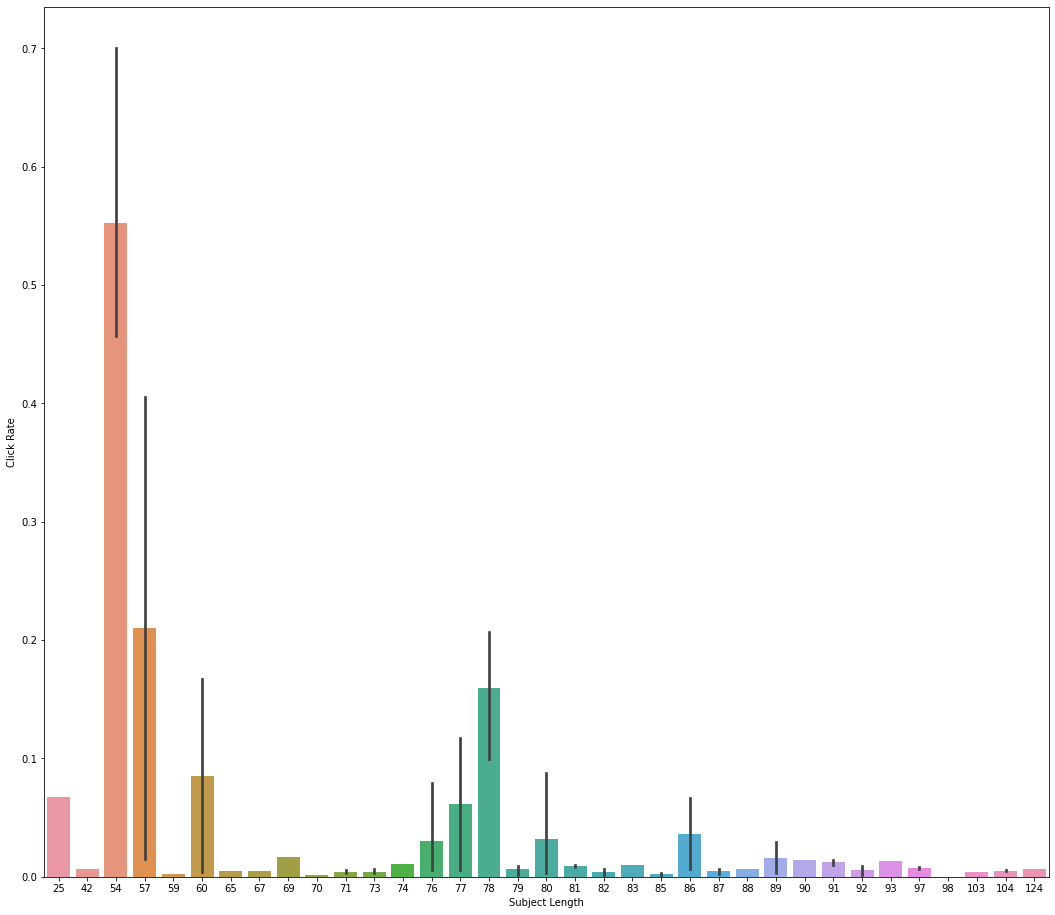

In [218]:
x = train_data["subject_len"].head(70)
y = train_data["click_rate"]
plt.figure(figsize=(18,16))
sns.barplot(x,y)
plt.ylabel("Click Rate")
plt.xlabel("Subject Length")

__Above bar graph shows that if the length of subject will be 54 to 57 and 78 then the click rate will be high.__

Text(0.5, 0, 'Body Length')

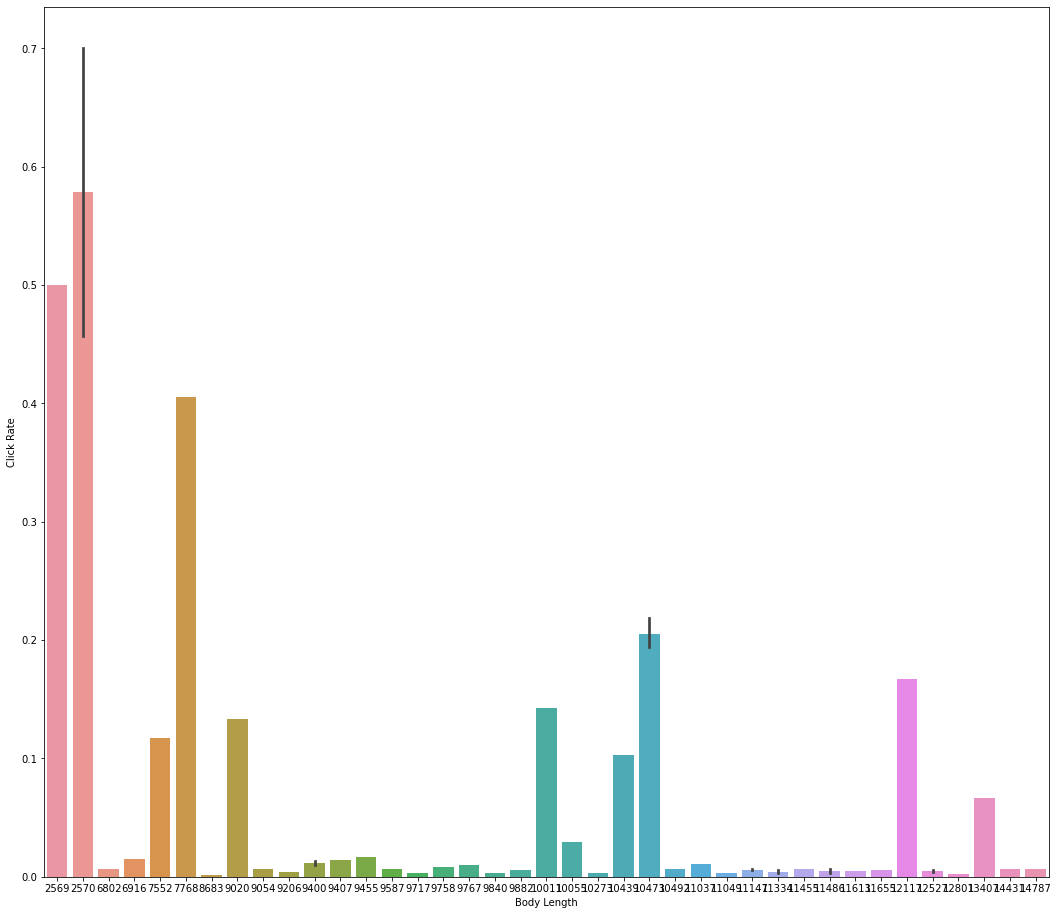

In [223]:
x_bod_len = train_data["body_len"].head(50)
y = train_data["click_rate"]
plt.figure(figsize=(18,16))
sns.barplot(x_bod_len,y)
plt.ylabel("Click Rate")
plt.xlabel("Body Length")

__Above bar graph shows that if the length of body will be 2569 to 2570 and 7768 then the click rate will be high.__

Text(0.5, 0, 'Number Of Image')

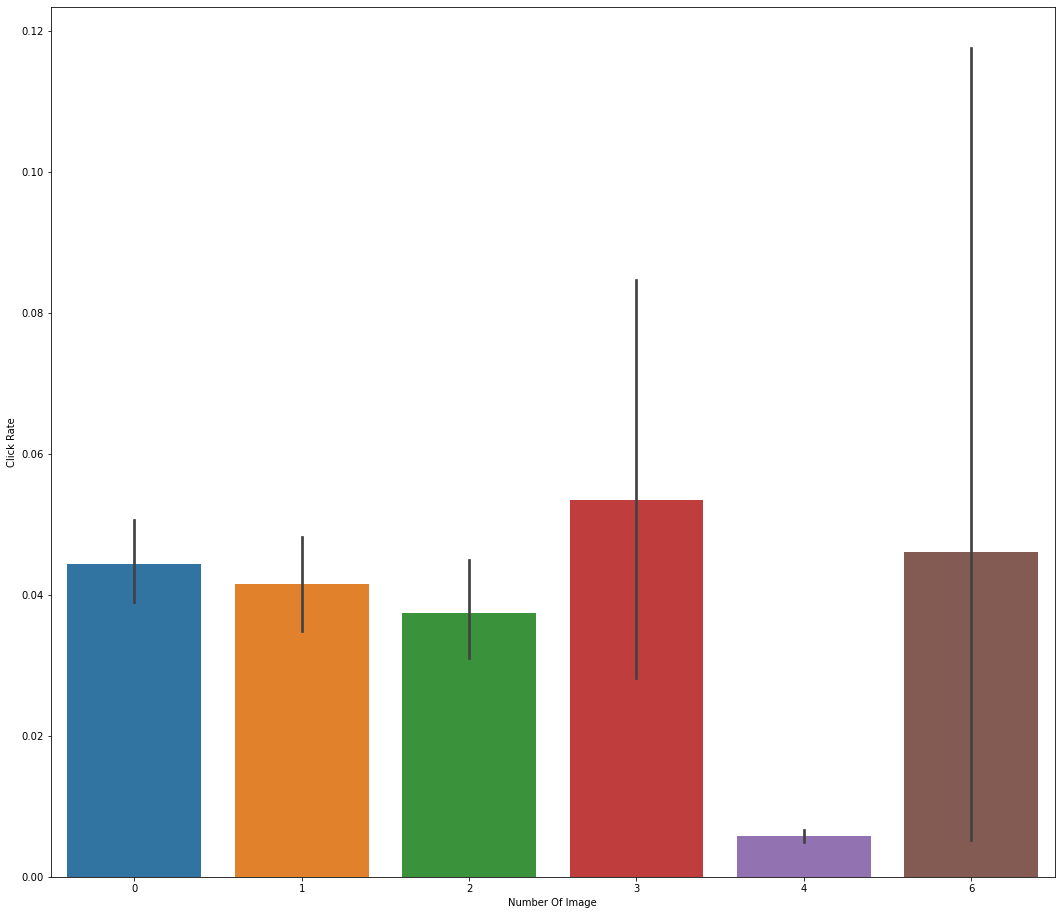

In [226]:
x_image = train_data["is_image"]
y = train_data["click_rate"]
plt.figure(figsize=(18,16))
sns.barplot(x_image,y)
plt.ylabel("Click Rate")
plt.xlabel("Number Of Image")

__Above bar graph shows that if the number of image will be 0, 3 and 6 then the click rate will be high.__

Now lets take a look at how the click rate is distributed

count    1888.000000
mean        0.041888
std         0.084223
min         0.000000
25%         0.005413
50%         0.010686
75%         0.035589
max         0.897959
Name: click_rate, dtype: float64


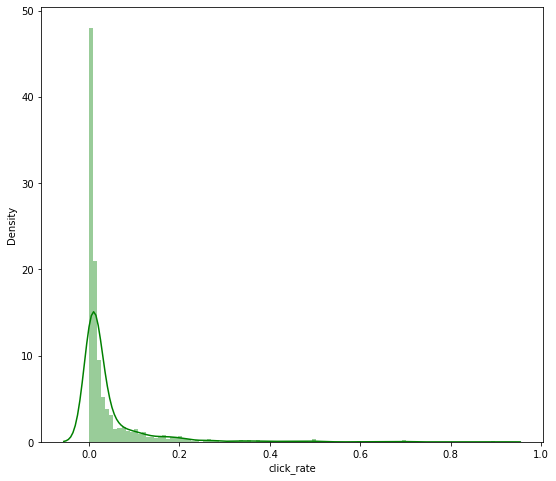

In [19]:
print(train_data['click_rate'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_data['click_rate'], color='g', bins=100, hist_kws={'alpha': 0.4});

With this information we can see that the click rate are skewed right and some outliers lies above ~0.2. We will eventually want to get rid of the them to get a normal distribution of the independent variable (`click rate`) for machine learning.

# Numerical data distribution

For this part lets look at the distribution of all of the features by ploting them

                Now lets plot them all:

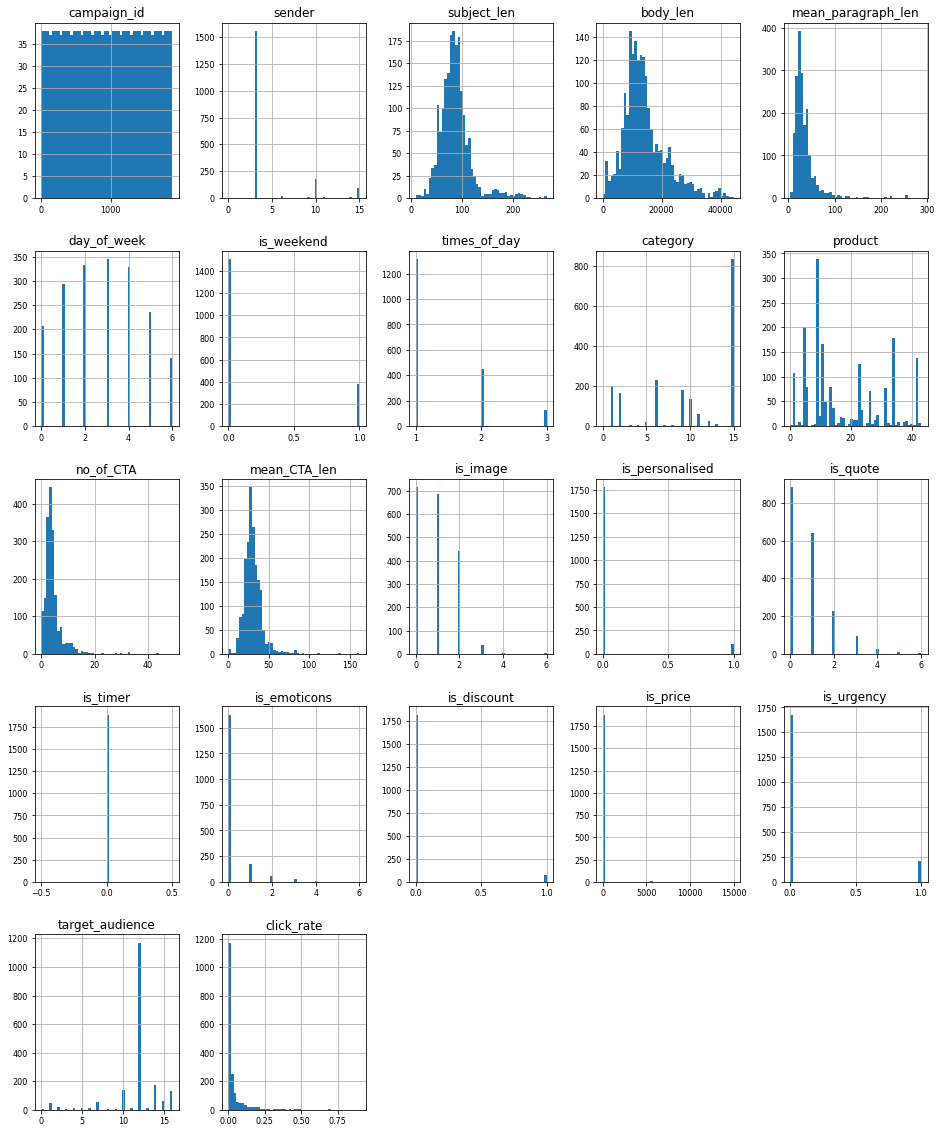

In [20]:
train_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

Features such as `subject_len`, `body_len`, `mean_paragraph_len`, `no_of_CTA`,`mean_CTA_len`... seems to share a similar distribution to the one we have with `click_rate`. Lets see if we can find new clues later.

# Correlation

Now we'll try to find which features are strongly correlated with click_rate. We'll store them in a var called golden_features_list. We'll reuse our train_data dataset to do so.

In [21]:
train_data_corr = train_data.corr()['click_rate'][:-1] # -1 because the latest row is click_rate
golden_features_list = train_data_corr[abs(train_data_corr) > 0.05].sort_values(ascending=False)
print("There is {} strongly correlated values with click_rate:\n{}".format(len(golden_features_list), golden_features_list))

There is 14 strongly correlated values with click_rate:
mean_paragraph_len    0.178042
times_of_day          0.161946
product               0.121602
is_weekend            0.114138
day_of_week           0.086372
campaign_id           0.053315
is_discount          -0.086105
is_emoticons         -0.094305
is_quote             -0.098402
is_urgency           -0.114284
category             -0.167756
no_of_CTA            -0.172637
subject_len          -0.180143
body_len             -0.247866
Name: click_rate, dtype: float64


Perfect, we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

      1. Plot the numerical features and see which ones have very few or explainable outliers
      
      2. Remove the outliers from these features and see which one can have a good correlation without their outliers
      
Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the click_rate.

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

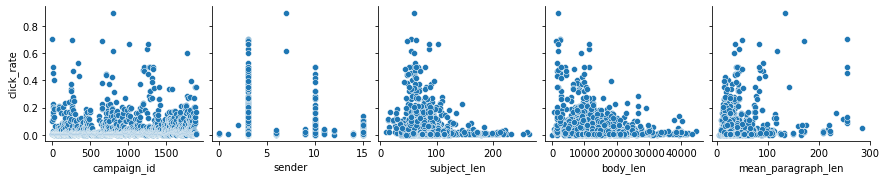

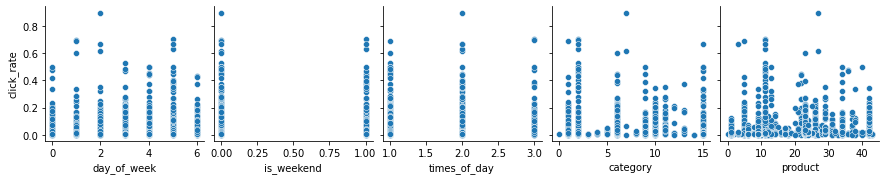

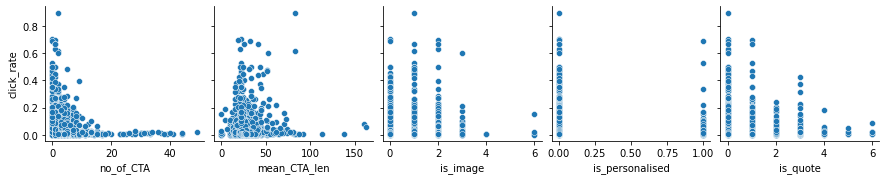

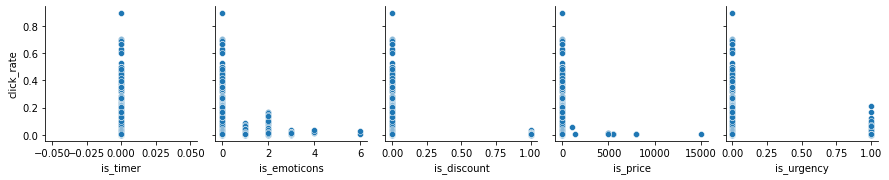

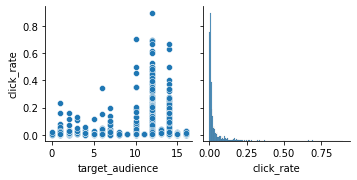

In [22]:
for i in range(0, len(train_data.columns), 5):
    sns.pairplot(data=train_data,
                x_vars=train_data.columns[i:i+5],
                y_vars=['click_rate'])

We can clearly identify some relationships. Most of them seems to have a same relationship with the click_rate.

# Conclusion

By looking at correlation between numerical values we discovered 15 features which have a strong relationship to a click_rate. Besides correlation we didn't find any notable pattern on the datas which are not correlated.

# Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

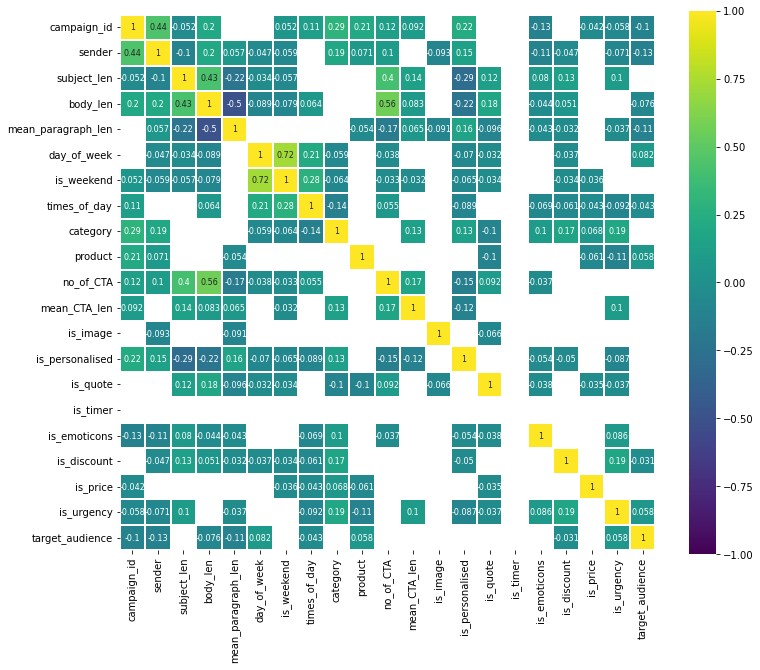

In [23]:
corr = train_data.drop('click_rate', axis=1).corr() # We already examined click_rate correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.05) | (corr <= -0.03)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

A lot of features seems to be correlated between each other.

There is of course a lot more to discover but I can't really explain the rest of the features except the most obvious ones.

#### We can conclude that, by essence, some of those features may be combined between each other or drop in order to reduce the number of features 

# Q -> Q (Quantitative to Quantitative relationship)

Let's now examine the quantitative features of our dataframe and how they relate to the click_rate which is also quantitative (hence the relation Q -> Q). I will conduct this analysis with the help of the Q -> Q chapter of the Standford MOOC

In [24]:
quantitative_features_list =['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate']
df_quantitative_values = train_data[quantitative_features_list]
df_quantitative_values.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,3,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,1,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


Still, we have a lot of features to analyse here so let's take the strongly correlated quantitative features from this dataset and analyse them one by one

In [25]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('click_rate')
features_to_analyse

['campaign_id',
 'subject_len',
 'body_len',
 'mean_paragraph_len',
 'day_of_week',
 'is_weekend',
 'times_of_day',
 'category',
 'product',
 'no_of_CTA',
 'is_quote',
 'is_emoticons',
 'is_discount',
 'is_urgency',
 'click_rate']

Let's look at their distribution.

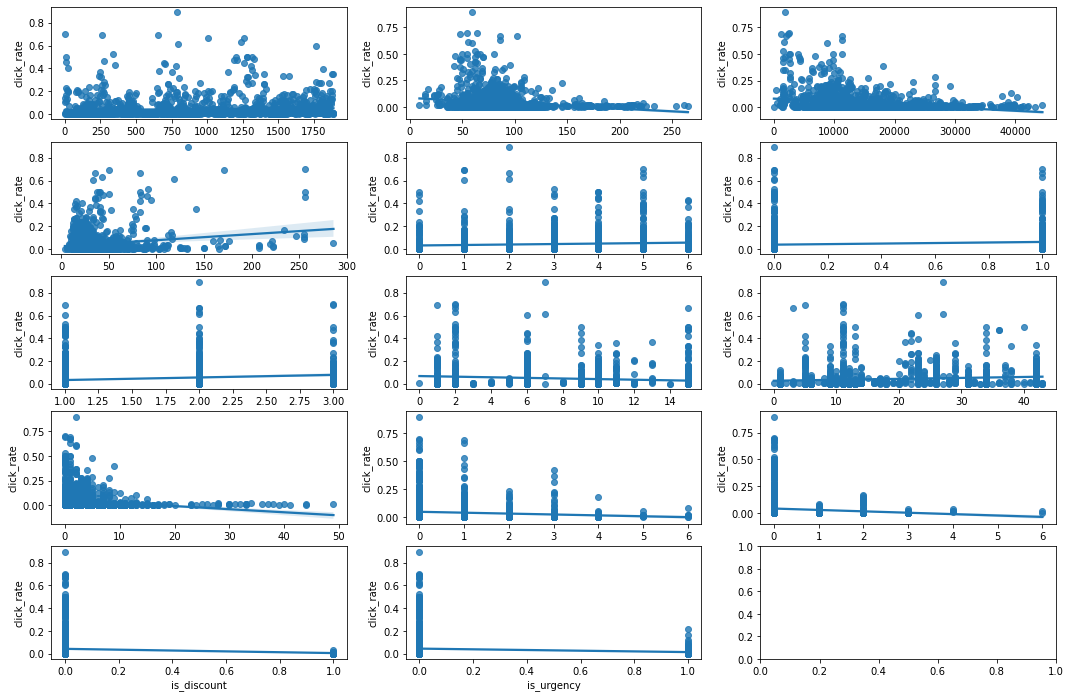

In [26]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='click_rate', data=train_data[features_to_analyse], ax=ax,)

We can see that features such as subject_len, body_len, mean_paragraph_len, no_of_CTA have a big spread but I cannot tell what insights this information gives us

# Step 5: Feature Selection 

In [27]:
train_data.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [28]:
test_data.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience'],
      dtype='object')

[2.54511100e-02 6.96950275e-02 1.66130110e-01 9.33848829e-02
 3.94915376e-02 2.55080111e-02 3.56740096e-02 8.23058881e-02
 5.93661448e-02 1.33958043e-01 8.64743262e-02 6.45233013e-02
 2.45551352e-02 3.93238387e-02 0.00000000e+00 6.04043140e-03
 3.23115775e-04 1.17162651e-04 5.06436860e-03 4.26135553e-02]


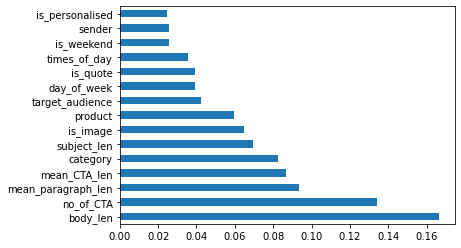

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
X = train_data.drop(['campaign_id','click_rate'],axis =1)
y = train_data['click_rate']
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [30]:
df_feature  = pd.DataFrame(feat_importances.nlargest(15))
features = df_feature.index
features

Index(['body_len', 'no_of_CTA', 'mean_paragraph_len', 'mean_CTA_len',
       'category', 'subject_len', 'is_image', 'product', 'target_audience',
       'day_of_week', 'is_quote', 'times_of_day', 'is_weekend', 'sender',
       'is_personalised'],
      dtype='object')

__creating new text data with features ['body_len', 'no_of_CTA', 'mean_paragraph_len', 'mean_CTA_len',
       'category', 'subject_len', 'is_image', 'product', 'target_audience',
       'day_of_week', 'times_of_day', 'is_quote', 'is_weekend', 'sender',
       'is_personalised']__

In [31]:
##create new test data with selected features
new_test_data = test_data[['body_len', 'no_of_CTA', 'mean_paragraph_len', 'mean_CTA_len',
       'category', 'subject_len', 'is_image', 'product', 'target_audience',
       'day_of_week', 'times_of_day', 'is_quote', 'is_weekend', 'sender',
       'is_personalised']]

In [32]:
new_test_data.head()

,body_len,no_of_CTA,mean_paragraph_len,mean_CTA_len,category,subject_len,is_image,product,target_audience,day_of_week,times_of_day,is_quote,is_weekend,sender,is_personalised
0,12871,3,11,37,6,61,1,26,14,6,2,0,1,3,0
1,2569,0,256,22,2,54,0,11,10,5,3,0,1,3,0
2,1473,0,78,22,2,88,1,11,10,4,1,1,0,3,0
3,1473,0,78,22,2,88,1,11,10,3,1,1,0,3,0
4,9020,2,29,40,6,78,0,26,14,3,2,0,0,3,0


# Step 6: Building Model

In [33]:
# let's see how well our model perform on this new data
## 20% data as validation set
x_train,x_test,y_train,y_test = train_test_split(X[features],y,test_size = 0.20, random_state= 355)

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [140]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    R2 = r2_score(test_labels, predictions)
    #mape = 100 * np.mean(errors / test_labels)
    #accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('r2_score = {:0.2f}%.'.format(float(R2*100)))
    
    #return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train,y_train)

base_accuracy = evaluate(base_model, x_test,y_test)

Model Performance
Average Error: 0.0286 degrees.
r2_score = 53.04%.


In [42]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,x_test,y_test)

Model Performance
Average Error: 0.0257 degrees.
r2_score = 60.90%.


In [43]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#from sklearn.preprocessing import Imputer

In [53]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [54]:
hyperParameterTuning(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [191]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.4,
        learning_rate = 0.1,
        max_depth = 32,
        min_child_weight = 1,
        n_estimators = 120,
        subsample = 0.7)
##XG Boost model after hyper-parameter tuning
%time xgb_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(x_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
R2_xgb = r2_score(y_test, y_pred_xgb)

print("MAE: ", mae_xgb)
print("R2: ", R2_xgb*100)

Wall time: 525 ms
MAE:  0.0262049692960297
R2:  64.91339784396176


XG Boost is having greater R2 score, hence we are taking xgb_model for final modelling.

In [89]:
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']}

In [135]:
# search across 50 different combinations, and use all available cores
XG_final = RandomizedSearchCV(estimator = xgb_model, param_distributions = param_tuning, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
XG_final.fit(X[features],y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.7,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, max_bin=256,
                                          max_cat...
                                          n_estimators=230, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 500],
                                        'objective': ['reg:squarederror'],
                                        'subsample': [0.5, 0.7]},
                   random_state=42, verbose=2)

In [136]:
best_final = XG_final.best_estimator_
pred_final = best_final.predict(test_data[features])

__merge outputs of XG Boost algorithm and randome forest for increasing the r2 value__

__Ensemble of two algorithms output which i have used above__

In [137]:
#Output of XG Boost algorithm for test data
pred_final

array([0.05607467, 0.50750446, 0.16998948, 0.16979209, 0.11037093,
       0.0301544 , 0.01151641, 0.01690223, 0.02213677, 0.03445326,
       0.03170891, 0.04329545, 0.01250425, 0.02798661, 0.01836698,
       0.01690667, 0.01250878, 0.02348543, 0.02561731, 0.03547562,
       0.01875441, 0.01833889, 0.01328979, 0.01900965, 0.01752256,
       0.01894108, 0.10292122, 0.00692908, 0.11064864, 0.01817787,
       0.0151805 , 0.0507682 , 0.01404106, 0.15244442, 0.04780969,
       0.03279167, 0.01300848, 0.00758662, 0.01073477, 0.05071831,
       0.01264481, 0.03887983, 0.01466286, 0.09358757, 0.05907792,
       0.0129166 , 0.0317399 , 0.0282911 , 0.05439223, 0.01490339,
       0.02678493, 0.01505276, 0.01516468, 0.02152649, 0.0077469 ,
       0.01616555, 0.03544611, 0.01784438, 0.00740019, 0.00612499,
       0.08337259, 0.00859909, 0.02034003, 0.00808701, 0.01816401,
       0.01950484, 0.00842388, 0.06140038, 0.02203148, 0.06522369,
       0.01608028, 0.17391026, 0.01631156, 0.01367004, 0.09994

In [138]:
#Output of random forest algorithm for test data
pred_final_1 = rf_random .predict(test_data[features])

In [141]:
pred_final_1

array([0.05783848, 0.29775985, 0.17356232, 0.20419172, 0.13918315,
       0.02677487, 0.00660774, 0.01648661, 0.01638152, 0.02858602,
       0.03041147, 0.01133436, 0.02620149, 0.01924393, 0.0143525 ,
       0.00764447, 0.00846858, 0.01725072, 0.01513874, 0.04413282,
       0.02271816, 0.0212592 , 0.00580357, 0.00716327, 0.0144705 ,
       0.01587953, 0.06786885, 0.01217379, 0.09836748, 0.01185823,
       0.00953093, 0.05630404, 0.00641134, 0.16088774, 0.02637354,
       0.04476303, 0.00595638, 0.00454028, 0.00710294, 0.0241931 ,
       0.0093117 , 0.01159166, 0.00832359, 0.0628948 , 0.05667499,
       0.00088291, 0.03401308, 0.01814434, 0.03397979, 0.01343619,
       0.01820481, 0.00998229, 0.00901299, 0.01824468, 0.00825699,
       0.00846707, 0.04533053, 0.01483902, 0.00477885, 0.00377503,
       0.06441552, 0.00679597, 0.02797378, 0.00434314, 0.01529017,
       0.01142292, 0.0060518 , 0.0665111 , 0.01480202, 0.08203479,
       0.01733778, 0.19256395, 0.01863773, 0.01538167, 0.11488

__Creating Dataframe for both algorithm__

In [193]:
output_rf = pd.DataFrame(pred_final_1)

In [194]:
y_pred_xgb = xgb_model.predict(test_data[features])## Output of XG Boost algorithm for test data

In [195]:
output_XG_1 = pd.DataFrame(y_pred_xgb)

In [196]:
mean_of_output = ((output_XG_1+output_rf)/2)

__create submission file__

In [227]:
y_pred_xgb = xgb_model.predict(test_data[features])

In [228]:
submission = pd.read_csv('sample_submission_LJ2N3ZQ.csv')
#final_predictions = XG_final.predict(new_test_data)
submission['click_rate'] = y_pred_xgb
#only positive predictions for the target variable
submission['click_rate'] = submission['click_rate']
submission.to_csv('my_submission4.csv', index=False)